# Importing Libraries

In [1]:
# Importing Libraries
import os
!pip install opencv-python
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import time
import platform

!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense,MaxPool2D,Dropout,Flatten,Conv2D,GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from random import choice,shuffle
from scipy import stats as st
from collections import deque

# Display py/tf/keras versions
!pip install tensorflow
import tensorflow as tf
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

import keras
print('Keras version:', keras.__version__)


Python version: 3.11.5
Tensorflow version: 2.15.0
Keras version: 2.15.0


# Data Collection

#### Function to lauch camera for data collection

In [2]:
def collect_data(num_samples):
    global rock, paper, scissor, nothing
    
    # Initialise the camera
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
    cap.set(3, 640)
    cap.set(4, 480)
    
    # Initialise to false
    trigger = False
    
    # Counter for the number of samples collected
    counter = 0
    
    # ROI size
    box_size = 234
    
    # Get the width of the frame from default camera properties
    width = int(cap.get(3))

    # Initialize class_name
    class_name = ''
    
    while True:
        # Read frame by frame
        ret, frame = cap.read()
    
        # Flip the frame horizontally
        frame = cv2.flip(frame, 1)
    
        # Break the loop if the frame isn't read properly
        if not ret:
            break
            
        # Display the current frame
        cv2.imshow("Frame", frame)
        
        # If counter is equal to the number of Samples.
        if counter == num_samples:   
            # Reset the trigger and counter
            trigger = not trigger
            counter = 100

        # Define ROI for capturing samples
        cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (38, 72, 249), 2)
    
        # If trigger - true, begin sample collection
        if trigger:
            # Collect data only from the selected ROI
            roi = frame[5: box_size -5 , width-box_size + 5: width -5]
            
            # Append "roi" and "class name" to the list
            eval(class_name).append([roi, class_name])
            
            counter += 1
            text = "Collected Samples of {}: {}".format(class_name, counter)
        
        else:
            text = "Please press one of the listed keys."
    
        # Show the counter on the frame
        cv2.putText(frame, text, (180, 460), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1, cv2.LINE_AA)
    
        # Read the background image
        samplingBG = cv2.imread("RPS Classification Model/SamplingScreen.png")
        
        # Scale the frame
        frameScaled = cv2.resize(frame, (0, 0), None, 0.63, 0.63)
        frameScaled = frameScaled[:, 101:403]
        
        # Put frame on the background image
        samplingBG[213:515, 473:775] = frameScaled

        # Display the windows
        cv2.imshow("Play: Rock Paper Scissors!", samplingBG)
    
        k = cv2.waitKey(1)
    
        # If the user presses one of the following keys, set class name to respective label, set trigger to true
        # R: class name = Rock
        if k == ord('r') or k == ord('R'):
            trigger = not trigger
            class_name = 'rock'
            rock = []
        
        # P: class name = Paper
        if k == ord('p') or k == ord('P'):
            trigger = not trigger
            class_name = 'paper'
            paper = []
        
        # S: class name = Scissor
        if k == ord('s') or k == ord('S'):
            trigger = not trigger
            class_name = 'scissor'
            scissor = []
        
        # N: class name = Nothing 
        if k == ord('n' ) or k == ord('N'):
            trigger = not trigger
            class_name = 'nothing'
            nothing = []

        # Exit if user presses Q
        if k == ord('q') or k == ord('Q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the function
num_samples = 100
collect_data(num_samples)

In [3]:
# model definition
from tensorflow.keras.models import load_model

# Load the model
model = load_model('RPS_Classifications.keras')

# Create a list of labels for the classes being predicted
label_names = ['nothing', 'paper', 'rock', 'scissor']

# Initialize the camera
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# ROI size
box_size = 234

# Get the width of the frame from default camera properties
width = int(cap.get(3))

while True:
    # Read frame by frame
    ret, frame = cap.read()

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    # Break the loop if the frame isn't read properly
    if not ret:
        break
        
    # Define ROI for capturing samples
    cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (38, 72, 249), 2)

    # Collect data only from the selected ROI
    roi = frame[5: box_size-5 , width-box_size + 5: width -5]

    # Normalize the image and convert to float64 array
    roi = np.array([roi]).astype('float64') / 255.0

    # Model Prediction
    pred = model.predict(roi)

    # Index of the target class
    target_index = np.argmax(pred[0])

    # Probability of the target class
    prob = np.max(pred[0])

    # Show results
    cv2.putText(frame, "prediction: {} {:.2f}%".format (label_names[np.argmax(pred[0])], prob*100 ),
                (180, 460), cv2.FONT_HERSHEY_SIMPLEX, 0.90, (0, 0, 255), 2, cv2.LINE_AA)

    # Read the background image
    testingBG = cv2.imread("RPS Classification Model/TestingScreen.png")
    
    # Scale the frame
    frameScaled = cv2.resize(frame, (0, 0), None, 0.63, 0.63)
    frameScaled = frameScaled[:,101:403]

    # Put frame on the background image
    testingBG[213:515, 473:775] = frameScaled
    
    # Display the windows
    cv2.imshow("Test: Rock Paper Scissors!", testingBG)

    # Break the loop if the user hits "Q"
    k = cv2.waitKey(1)
    if k == ord('q') or k == ord('Q'):
        break

cap.release()
cv2.destroyAllWindows()



1/1 [==============================] - 0s 46ms/step


In [4]:
# Create a list of labels for the classes being predicted
label_names = ['nothing', 'paper', 'rock', 'scissor']

# Initialize the camera
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# ROI size
box_size = 234

# Get the width of the frame from default camera properties
width = int(cap.get(3))

while True:
    # Read frame by frame
    ret, frame = cap.read()

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    # Break the loop if the frame isn't read properly
    if not ret:
        break
        
    # Define ROI for capturing samples
    cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (38, 72, 249), 2)

    # Collect data only from the selected ROI
    roi = frame[5: box_size-5 , width-box_size + 5: width -5]

    # Normalize the image and convert to float64 array
    roi = np.array([roi]).astype('float64') / 255.0

    # Model Prediction
    pred = model.predict(roi)

    # Index of the target class
    target_index = np.argmax(pred[0])

    # Probability of the target class
    prob = np.max(pred[0])

    # Show results
    cv2.putText(frame, "prediction: {} {:.2f}%".format (label_names[np.argmax(pred[0])], prob*100 ),
                (180, 460), cv2.FONT_HERSHEY_SIMPLEX, 0.90, (0, 0, 255), 2, cv2.LINE_AA)

    # Read the background image
    testingBG = cv2.imread("RPS Classification Model/TestingScreen.png")
    
    # Scale the frame
    frameScaled = cv2.resize(frame, (0, 0), None, 0.63, 0.63)
    frameScaled = frameScaled[:,101:403]

    # Put frame on the background image
    testingBG[213:515, 473:775] = frameScaled
    
    # Display the windows
    cv2.imshow("Test: Rock Paper Scissors!", testingBG)

    # Break the loop if the user hits "Q"
    k = cv2.waitKey(1)
    if k == ord('q') or k == ord('Q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 43ms/step


# Analysation and Visualization of Data

#### Visualization for data collected

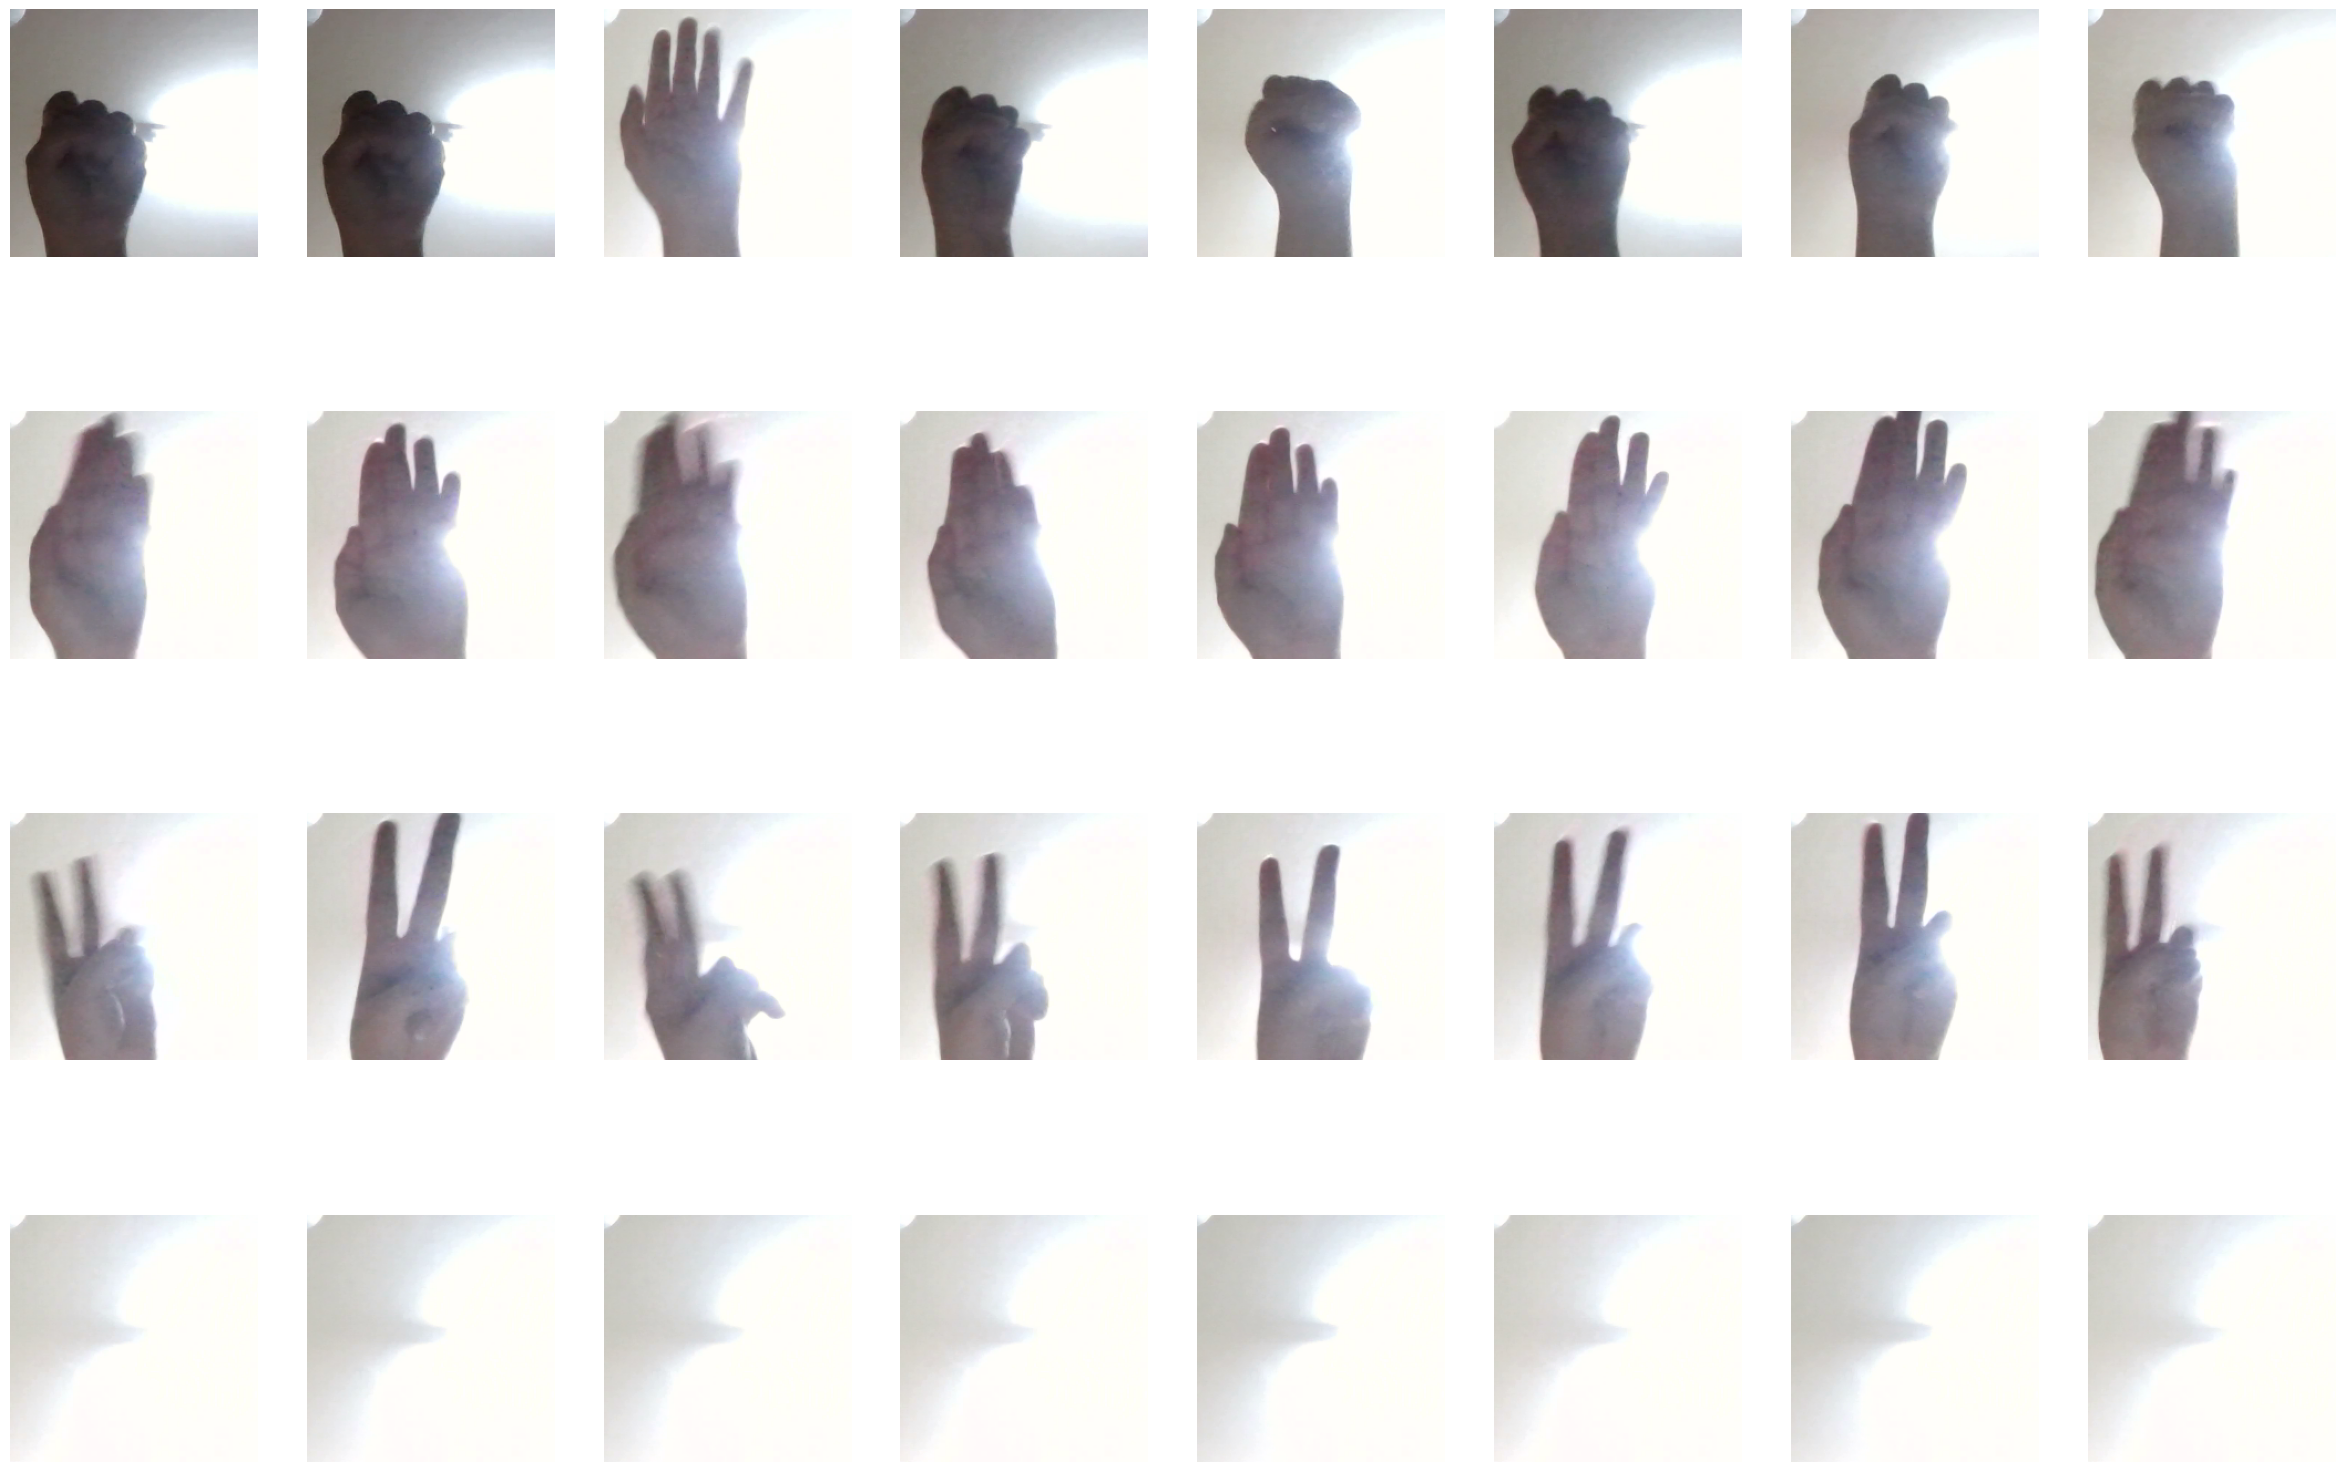

In [5]:
# Set the figure size
plt.figure(figsize=[30, 20])

# Set the number of rows and columns
rows, cols = 4, 8

# Iterate through each class in the list
for class_index, each_list in enumerate([rock, paper, scissor, nothing]):
    
    # Ensure the class list has at least 8 samples
    if len(each_list) < 8:
        print(f"Class {class_index} has less than 8 samples.")
        continue
    
    # Get 8 random indexes in the array
    r = np.random.randint(len(each_list), size=8)
    
    # Iterate through the indexes
    for i, example_index in enumerate(r, 1):
        plt.subplot(rows, cols, class_index * cols + i)
        plt.imshow(each_list[example_index][0][:, :, ::-1])
        plt.axis('off')

#### Heatmap Visualization for data collected

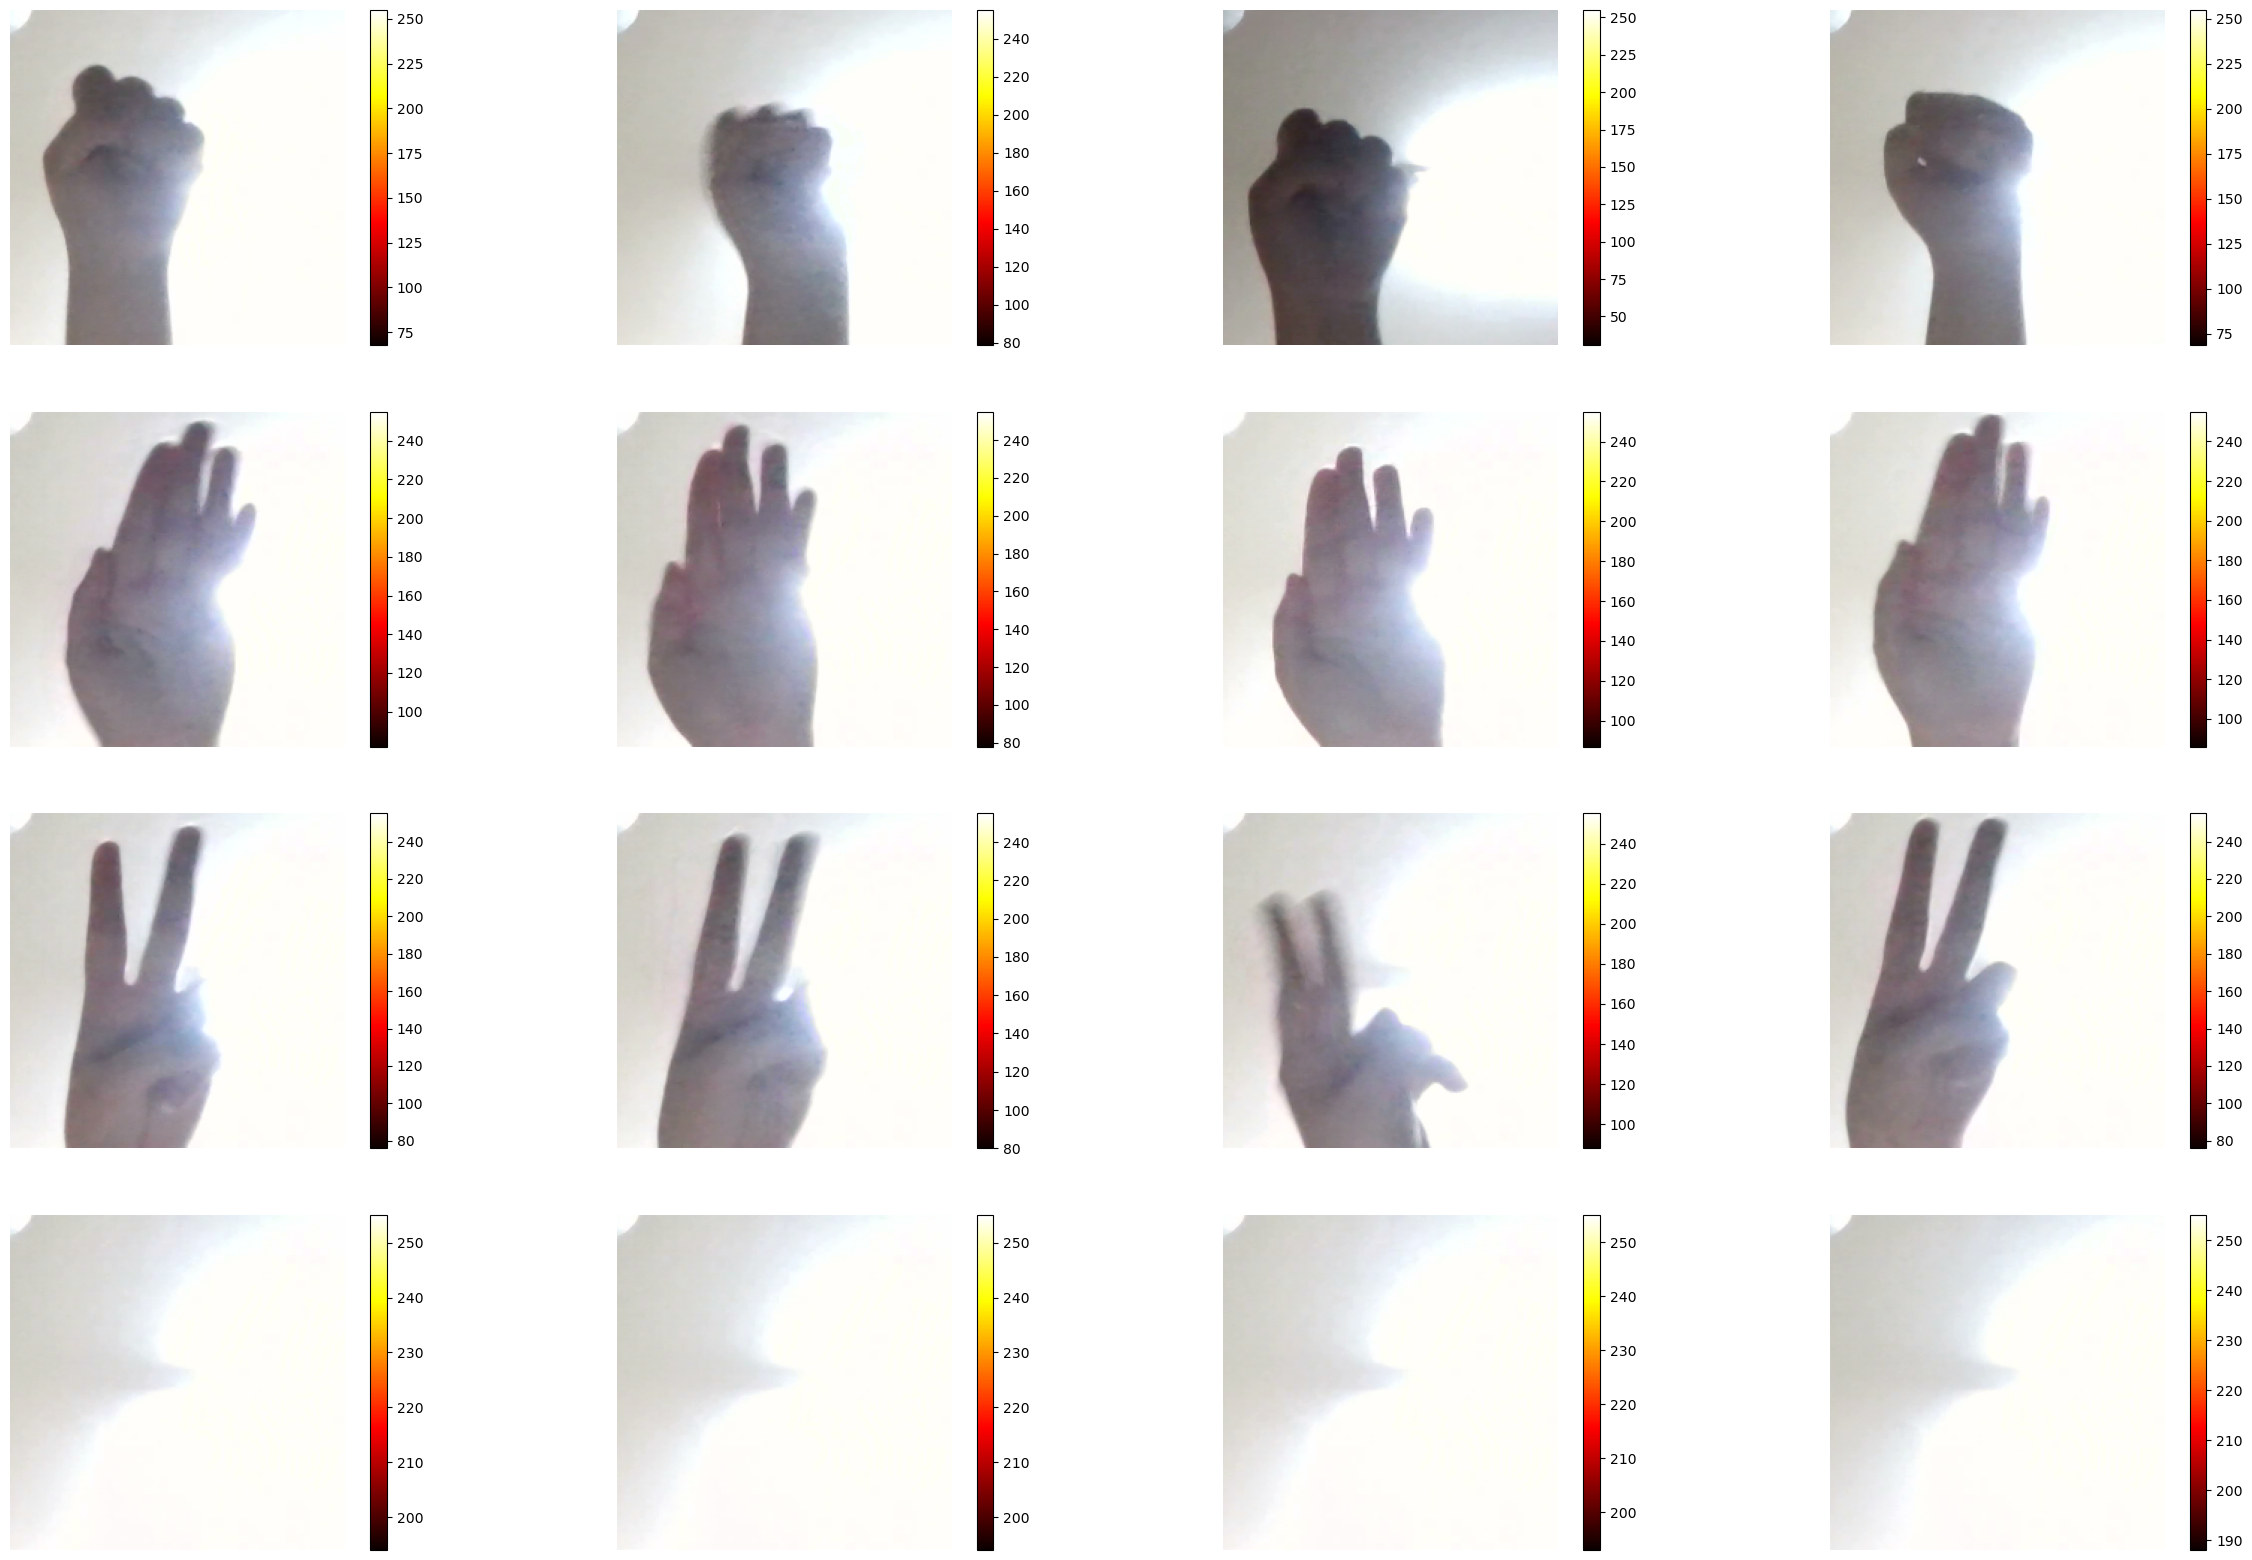

In [6]:
# Set the figure size
plt.figure(figsize=(30, 20))

# Set the number of rows and columns
rows, cols = 4, 4

# Iterate through each class in the list
for class_index, each_list in enumerate([rock, paper, scissor, nothing]):
    
    # Check if the list has enough samples
    if len(each_list) >= 4:
        # Get 4 random indexes in the array
        r = np.random.randint(len(each_list), size=4)
        
        # Iterate through the indexes
        for i, example_index in enumerate(r, 1):
            plt.subplot(rows, cols, class_index * cols + i)
            plt.imshow(each_list[example_index][0][:, :, ::-1], cmap="hot")
            plt.colorbar()
            plt.axis('off')
    else:
        print(f"Warning: Not enough samples in class {class_index + 1}")

#### Histogram Plot Visualization for data collected

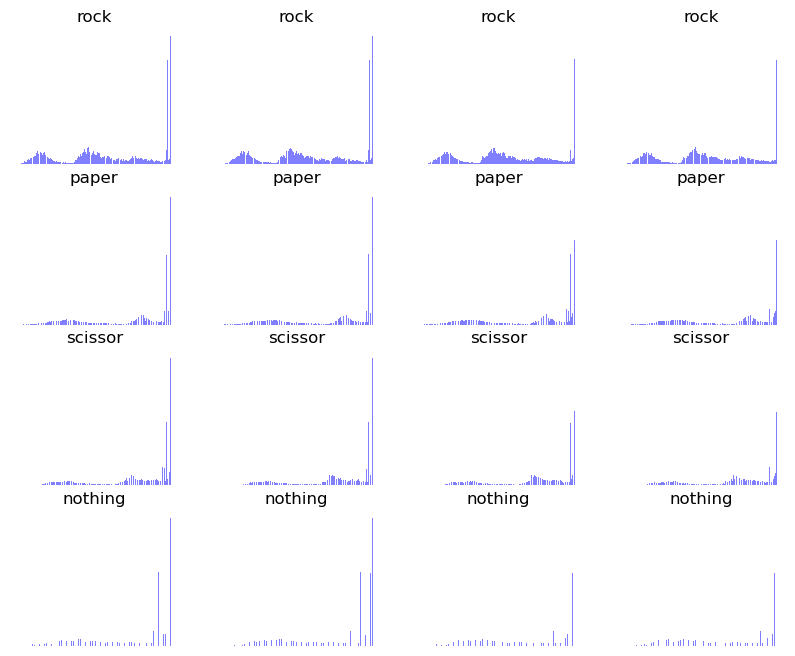

In [7]:
# Get the images and labels from the rock, paper, scissors, and nothing variables
rock_images = [x[0] for x in rock][:4]
rock_labels = [x[1] for x in rock][:4]

paper_images = [x[0] for x in paper][:4]
paper_labels = [x[1] for x in paper][:4]

scissors_images = [x[0] for x in scissor][:4]
scissors_labels = [x[1] for x in scissor][:4]

nothing_images = [x[0] for x in nothing][:4]
nothing_labels = [x[1] for x in nothing][:4]

images = rock_images + paper_images + scissors_images + nothing_images
labels = rock_labels + paper_labels + scissors_labels + nothing_labels

# Set the figure size
plt.figure(figsize=(10, 8))

# Set the number of rows and columns for the subplots
rows = 4
cols = 4

# Iterate through the images
for i in range(len(images)):
    plt.subplot(rows, cols, i + 1)
    plt.hist(images[i].ravel(), bins=256, color='blue', alpha=0.5)
    plt.xlabel("Pixel values")
    plt.ylabel("Frequency")
    plt.title(labels[i])
    plt.axis("off")

plt.show()

# Model Training

#### Processing data

In [8]:
# Combine the labels of all classes together
labels = [x[1] for x in rock] + [x[1] for x in paper] + [x[1] for x in scissor] +[x[1] for x in nothing]

# Combine the images of all classes together
images = [x[0] for x in rock] + [x[0] for x in paper] + [x[0] for x in scissor] +[x[0] for x in nothing]

In [9]:
# Print out the total number of labels and images.
print('Total images: {} , Total Labels: {}'.format(len(labels), len(images)))

Total images: 522 , Total Labels: 522


In [10]:
# Normalize the images by scaling to a range between 0 and 1
images = np.array(images, dtype="float") / 255

# Create an encoder Object
encoder = LabelEncoder()

# Convert Labels to integers in alphabetical order
# nothing= 0, paper = 1, rock = 2, scissor = 3
Int_labels = encoder.fit_transform(labels)

# Convert int labels to one-hot
one_hot_labels = to_categorical(Int_labels, 4)

In [11]:
# Splitting data into 75% and 25% ratio: train = 75% and test = 25%
(X_train, X_test, Y_train, Y_test) = train_test_split(images, one_hot_labels, test_size=0.25, random_state=50)
# Empty memory from RAM
images = []

#### Creating and fine tuning 

In [12]:
# the input size matches the size of the captured ROI
image_size = 224

# Create an instance of NASNetMobile model without the head
N_mobile = tf.keras.applications.NASNetMobile( input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')

# Freeze all layers of the NASNetMobile model
N_mobile.trainable = False

# Connect the output of the NASNetMobile model to a GlobalAveragePooling2D Layer
x = N_mobile.output
x = GlobalAveragePooling2D()(x)

# Add a Dense layer with 712 neurons and ReLU activation
x = Dense(712, activation='relu')(x)

# Dropout layer with a rate of 0.40 to reduce overfitting
x = Dropout(0.48)(x)

# Connect the output of the Dropout layer to a Dense layer with 4 neurons and 'softmax' activation
preds = Dense(4,activation='softmax')(x)

# Create the final model by connecting the input of NASNetMobile model to the output of the Dense layer
model = Model(inputs=N_mobile.input, outputs=preds)

# Print the number of layers in the model
print ("Number of Layers in Model: {}".format(len(model.layers[:])))

Number of Layers in Model: 773


#### Training the model

In [13]:
# Transformations to ensure that the model works in as many scenarios as possible
augment = ImageDataGenerator(
    channel_shift_range=0.10,  # randomly shift color channels
    width_shift_range=-0.10,   # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.10,   # randomly shift images vertically (fraction of total height)
    rotation_range=30,         # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.25,           # Randomly zoom image
    shear_range=0.10,          # shear intensity (shear angle in counter-clockwise direction as radians)
    horizontal_flip=True,      # randomly flip images
    fill_mode="nearest"        # method used for filling in newly created pixels
)
# Cannot add brightness range as it would lead to overfitting

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Set batchsize according to your system
epochs = 10
batchsize = 20

# Start training
history = model.fit(augment.flow(X_train, Y_train, batch_size=batchsize), validation_data=(X_test, Y_test),
                    steps_per_epoch=len(X_train) // batchsize, epochs=epochs)


Epoch 1/10


19/19 [==============================] - 20s 474ms/step - loss: 1.0999 - accuracy: 0.5526 - val_loss: 0.6264 - val_accuracy: 0.9160
Epoch 2/10
19/19 [==============================] - 6s 313ms/step - loss: 0.6062 - accuracy: 0.8383 - val_loss: 0.3106 - val_accuracy: 0.9618
Epoch 3/10
19/19 [==============================] - 6s 331ms/step - loss: 0.4324 - accuracy: 0.8841 - val_loss: 0.1929 - val_accuracy: 0.9847
Epoch 4/10
19/19 [==============================] - 6s 337ms/step - loss: 0.3062 - accuracy: 0.9353 - val_loss: 0.1374 - val_accuracy: 0.9847
Epoch 5/10
19/19 [==============================] - 6s 337ms/step - loss: 0.2745 - accuracy: 0.9353 - val_loss: 0.1080 - val_accuracy: 0.9847
Epoch 6/10
19/19 [==============================] - 6s 325ms/step - loss: 0.2292 - accuracy: 0.9542 - val_loss: 0.0840 - val_accuracy: 0.9924
Epoch 7/10
19/19 [==============================] - 6s 306ms/step - loss: 0.2287 - accuracy: 0.9380 - val_loss: 0.0835 - val_accuracy: 0.9847
Epo

# Model Evaluation

In [16]:
# Importing all necessary Libraries
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
# Show accuracy without formatting
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

5/5 [==============================] - 1s 176ms/step - loss: 0.0578 - accuracy: 0.9847
Test accuracy: 98.47%


In [18]:
# Store the accuracy values of the training and validation set
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs
epochs = range(len(acc))

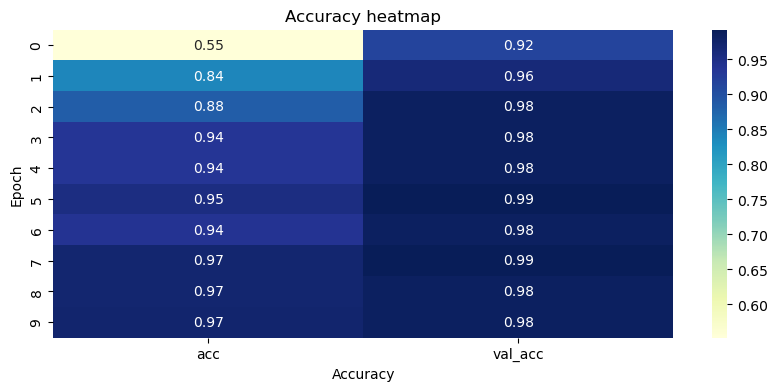

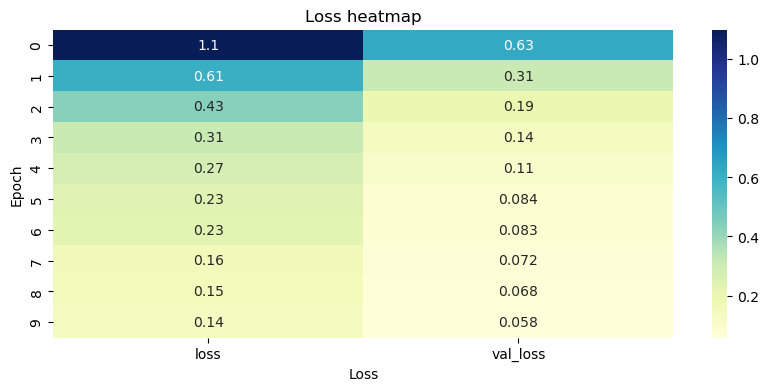

In [19]:
# Create a dataframe with the accuracy and loss values
data = {'epoch': epochs, 'acc': acc, 'val_acc': val_acc, 'loss': loss, 'val_loss': val_loss}
df = pd.DataFrame(data)

# Create a heatmap of the accuracy values
plt.figure(figsize=(10,4))
sns.heatmap(df[['acc', 'val_acc']], annot=True, cmap='YlGnBu')
plt.title('Accuracy heatmap')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')

# Create a heatmap of the loss values
plt.figure(figsize=(10,4))
sns.heatmap(df[['loss', 'val_loss']], annot=True, cmap='YlGnBu')
plt.title('Loss heatmap')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.show()

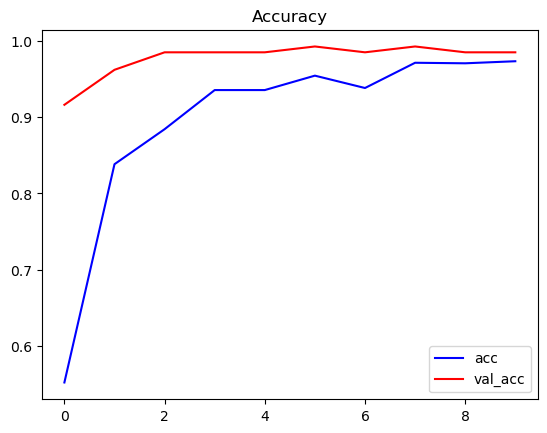

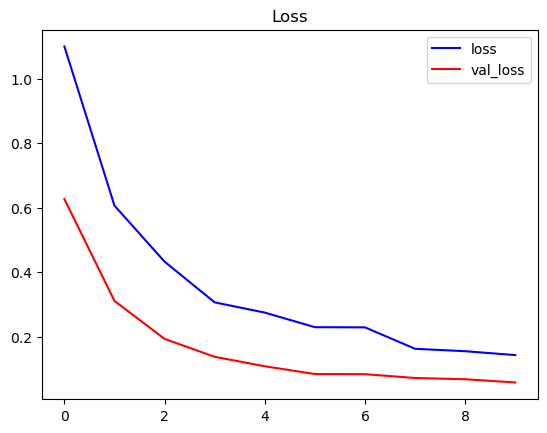

In [20]:
# Plot the accuracy values
plt.plot(epochs, acc, 'b', label='acc')
plt.plot(epochs, val_acc, 'r', label='val_acc')
plt.title('Accuracy')
plt.legend()

# Create a new figure
plt.figure()

# Plot the Loss values
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.title("Loss")
plt.legend()

plt.show()

#### Saving the model

In [21]:
model.save( "RPS_Classifications.keras", overwrite=True)

#### Loading the model

In [22]:
model = load_model("RPS_Classifications.keras")

#### Testing the accuracy on camera

In [23]:
# Create a list of labels for the classes being predicted
label_names = ['nothing', 'paper', 'rock', 'scissor']

# Initialize the camera
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# ROI size
box_size = 234

# Get the width of the frame from default camera properties
width = int(cap.get(3))

while True:
    # Read frame by frame
    ret, frame = cap.read()

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    # Break the loop if the frame isn't read properly
    if not ret:
        break
        
    # Define ROI for capturing samples
    cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (38, 72, 249), 2)

    # Collect data only from the selected ROI
    roi = frame[5: box_size-5 , width-box_size + 5: width -5]

    # Normalize the image and convert to float64 array
    roi = np.array([roi]).astype('float64') / 255.0

    # Model Prediction
    pred = model.predict(roi)

    # Index of the target class
    target_index = np.argmax(pred[0])

    # Probability of the target class
    prob = np.max(pred[0])

    # Show results
    cv2.putText(frame, "prediction: {} {:.2f}%".format (label_names[np.argmax(pred[0])], prob*100 ),
                (180, 460), cv2.FONT_HERSHEY_SIMPLEX, 0.90, (0, 0, 255), 2, cv2.LINE_AA)

    # Read the background image
    testingBG = cv2.imread("RPS Classification Model/TestingScreen.png")
    
    # Scale the frame
    frameScaled = cv2.resize(frame, (0, 0), None, 0.63, 0.63)
    frameScaled = frameScaled[:,101:403]

    # Put frame on the background image
    testingBG[213:515, 473:775] = frameScaled
    
    # Display the windows
    cv2.imshow("Test: Rock Paper Scissors!", testingBG)

    # Break the loop if the user hits "Q"
    k = cv2.waitKey(1)
    if k == ord('q') or k == ord('Q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 46ms/step


# The END